In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal as sig
from matplotlib import colors

## 1. Different types of wavelets

In [2]:
sample_rate = 1024
Npnts = sample_rate*5 + 1
timevec = np.linspace(-2.5 , 2.5 , Npnts)
hz = np.linspace(0 , sample_rate , Npnts)

### 1.1 Morlet Wavelet

In [3]:
freq = 4 # Hz - Peak Frequency
csw = np.cos(2*np.pi*freq*timevec) # Cosine Wave
FWHM = 0.5 # Full-width at half-maximum in seconds
gaus = np.exp(-(4*np.log(2)*timevec**2) / FWHM**2)

MorletWavelet = csw * gaus 
MorletWavelet_pow = np.abs(np.fft.fft(MorletWavelet)/Npnts)

### 1.2 Haar Wavelet (Edge Detector)

In [4]:
One   = np.argmin(np.abs(timevec - 0   ))
Minus = np.argmin(np.abs(timevec - 0.5 )) - One
stop  = np.argmin(np.abs(timevec - 1   )) - (Minus + One)

HaarWavelet = np.append(np.zeros(One) , np.ones(Minus))
HaarWavelet = np.append(HaarWavelet   , -np.ones(stop))
HaarWavelet = np.append(HaarWavelet   , np.zeros(len(timevec) - len(HaarWavelet)))

HaarWavelet_pow = np.abs(np.fft.fft(HaarWavelet)/Npnts)

### 1.3 Maxican hat wavelet

In [5]:
s = 0.4
MaxicanWavelet = (2 / (np.sqrt(3*s)*np.pi**0.25)) * (1 - (timevec**2) / (s**2) ) * np.exp( (-timevec**2) / (2*s**2) )
MaxicanWavelet_pow = np.abs(np.fft.fft(MaxicanWavelet)/Npnts)

### 1.4 Difference of Gaussian (DoG)

In [6]:
sPos = 0.1
sNeg = 0.5

gaus_1 = np.exp( (-timevec**2) / (2*sPos**2) ) / ( sPos*np.sqrt(2*np.pi) )
gaus_2 = np.exp( (-timevec**2) / (2*sNeg**2) ) / ( sNeg*np.sqrt(2*np.pi) )

DoG = gaus_1 - gaus_2
DoG_pow = np.abs(np.fft.fft(DoG)/Npnts)

### 1.5 Plots

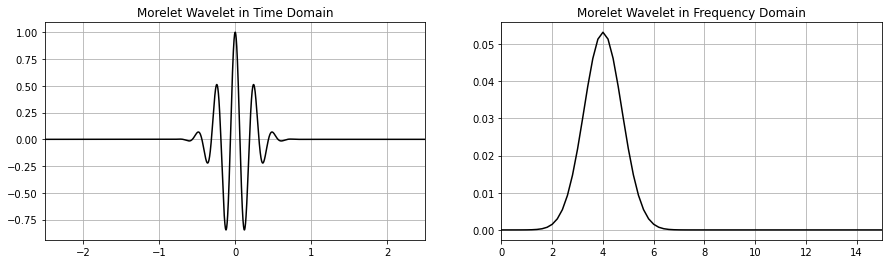

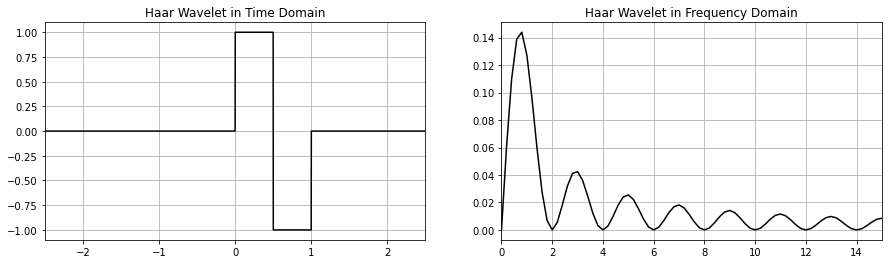

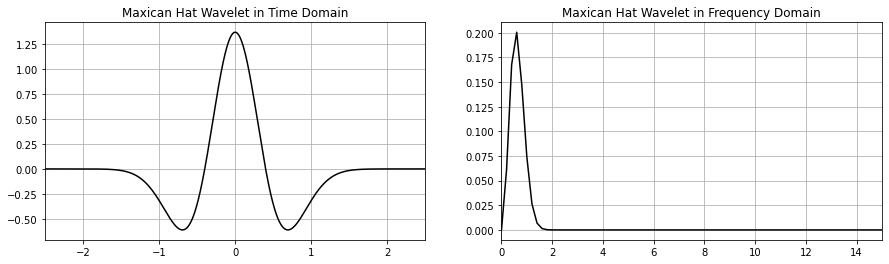

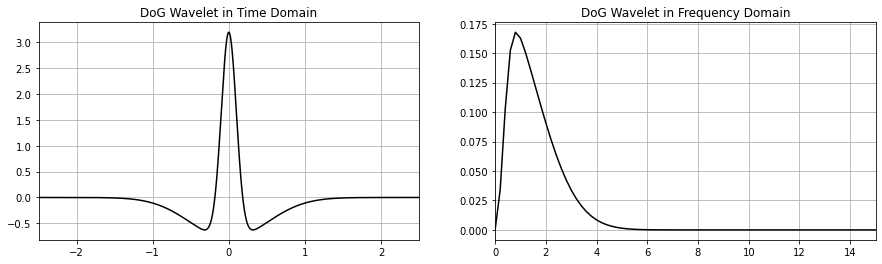

In [7]:
##########################################################
## Morelet Wavelate 
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(timevec , MorletWavelet , c='black')
plt.title('Morelet Wavelet in Time Domain')
plt.grid()
plt.xlim([-2.5 , 2.5])

plt.subplot(1,2,2)
plt.plot(hz , MorletWavelet_pow , c='black')
plt.title('Morelet Wavelet in Frequency Domain')
plt.xlim([0 , 15])
plt.grid()

##########################################################
## Haar Wavelate 
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(timevec , HaarWavelet , c='black')
plt.title('Haar Wavelet in Time Domain')
plt.grid()
plt.xlim([-2.5 , 2.5])

plt.subplot(1,2,2)
plt.plot(hz , HaarWavelet_pow , c='black')
plt.title('Haar Wavelet in Frequency Domain')
plt.xlim([0 , 15])
plt.grid()

##########################################################
## Mexican Hat Wavelate 
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(timevec , MaxicanWavelet , c='black')
plt.title('Maxican Hat Wavelet in Time Domain')
plt.grid()
plt.xlim([-2.5 , 2.5])

plt.subplot(1,2,2)
plt.plot(hz , MaxicanWavelet_pow  , c='black')
plt.title('Maxican Hat Wavelet in Frequency Domain')
plt.xlim([0 , 15])
plt.grid()

##########################################################
## DoG Wavelate 
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.plot(timevec , DoG , c='black')
plt.title('DoG Wavelet in Time Domain')
plt.grid()
plt.xlim([-2.5 , 2.5])

plt.subplot(1,2,2)
plt.plot(hz , DoG_pow  , c='black')
plt.title('DoG Wavelet in Frequency Domain')
plt.xlim([0 , 15])
plt.grid()

## 2. Convolution with wavelets

In [8]:
Signal = np.cumsum(np.random.randn(Npnts))
Signal_fft = np.abs( np.fft.fft( Signal ) / Npnts )

### 2.1 Filtering the signal using Wavelets

In [9]:
Signal_filt_More = np.convolve(Signal , MorletWavelet  , mode='same' ) 
Signal_filt_More = Signal_filt_More/ np.max(Signal_filt_More) *np.max(abs(Signal))
Signal_filt_Haar = np.convolve(Signal , HaarWavelet    , mode='same' ) 
Signal_filt_Haar = Signal_filt_Haar/ np.max(Signal_filt_Haar) *np.max(abs(Signal))
Signal_filt_Mexi = np.convolve(Signal , MaxicanWavelet , mode='same' ) 
Signal_filt_Mexi = Signal_filt_Mexi/ np.max(Signal_filt_Mexi) *np.max(abs(Signal))
Signal_filt_DoG  = np.convolve(Signal , DoG , mode='same' ) 
Signal_filt_DoG = Signal_filt_DoG/ np.max(Signal_filt_DoG) *np.max(abs(Signal))

Signal_filt_More_fft = np.abs( np.fft.fft( Signal_filt_More ) / Npnts )
Signal_filt_Haar_fft = np.abs( np.fft.fft( Signal_filt_Haar ) / Npnts )
Signal_filt_Mexi_fft = np.abs( np.fft.fft( Signal_filt_Mexi ) / Npnts )
Signal_filt_DoG_fft  = np.abs( np.fft.fft( Signal_filt_DoG  ) / Npnts )

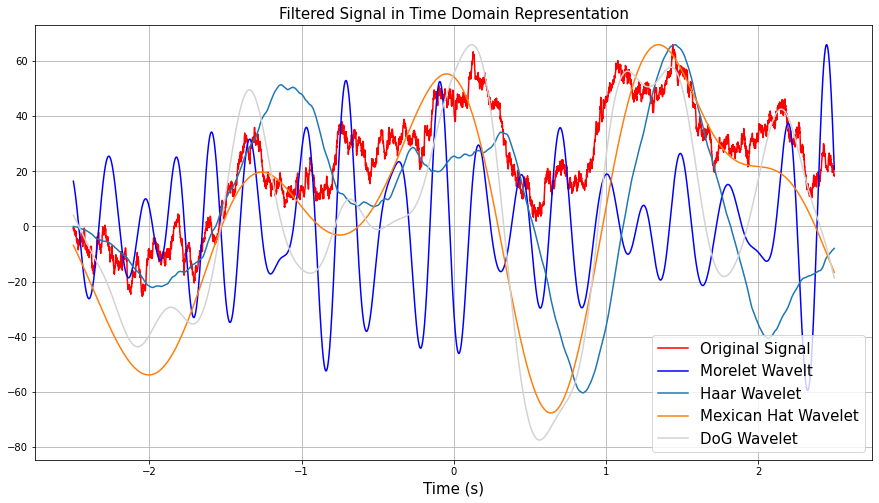

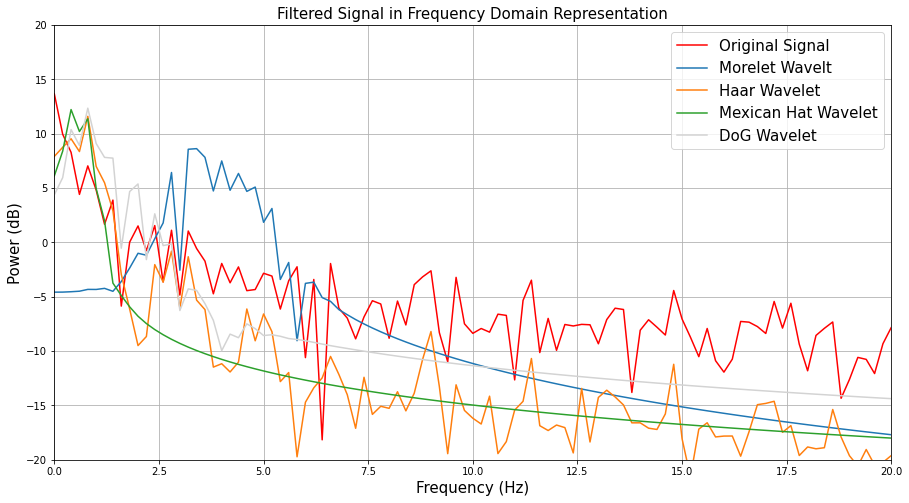

In [10]:
plt.figure(figsize = (15,8))
plt.plot(timevec , Signal , label = 'Original Signal' , c='r')
plt.plot(timevec , Signal_filt_More , label = 'Morelet Wavelt' , c = 'blue')
plt.plot(timevec , Signal_filt_Haar , label = 'Haar Wavelet')
plt.plot(timevec , Signal_filt_Mexi , label = 'Mexican Hat Wavelet')
plt.plot(timevec , Signal_filt_DoG , label = 'DoG Wavelet' , c='lightgrey')
plt.title('Filtered Signal in Time Domain Representation' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(Signal_fft) , label = 'Original Signal', c='r')
plt.plot(hz , 10*np.log10(Signal_filt_More_fft) , label = 'Morelet Wavelt')
plt.plot(hz , 10*np.log10(Signal_filt_Haar_fft) , label = 'Haar Wavelet')
plt.plot(hz , 10*np.log10(Signal_filt_Mexi_fft) , label = 'Mexican Hat Wavelet')
plt.plot(hz , 10*np.log10(Signal_filt_DoG_fft) , label = 'DoG Wavelet', c='lightgrey')
plt.title('Filtered Signal in Frequency Domain Representation' , fontsize = 15)
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.ylabel('Power (dB)' , fontsize = 15)
plt.xlim([0,20])
plt.ylim([-20 , 20])
plt.legend(fontsize = 15)
plt.grid()

## 3. Time-Frequency Analysis

### 3.1 Solomon Island Earthquake time history, 2004.
could be found at: http://www.vibrationdata.com/Solomon_Time_History.zip

In [11]:
earth_quake = open('Solomon_Time_History.txt', "r")
time = []
data = []
count = 0 
for x in earth_quake:
    count +=1
    if np.mod(count,10) == 0 : # This is for low-power computers just like mine ;)
        time = np.append(time , float(x.split()[0]))
        data = np.append(data , float(x.split()[1]))

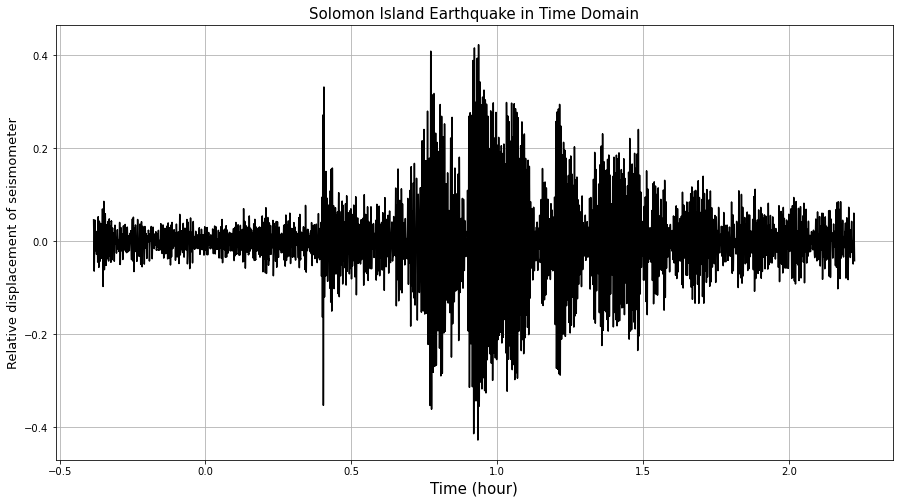

In [12]:
plt.figure(figsize = (15,8))
plt.plot(time/60/60 , data , c = 'black')
plt.title('Solomon Island Earthquake in Time Domain' , fontsize = 15)
plt.xlabel('Time (hour)' , fontsize = 15)
plt.ylabel('Relative displacement of seismometer' , fontsize = 13)
plt.grid()

In [13]:
## Estimating the sample rate:
sample_rate = 1 / np.mean(np.diff(time)) # Hz - This might be vary based on how much data is inserted above. 

In [14]:
winsize = sample_rate * 60 * 10 # Window of 10 min
hz , data_pwelch = sig.welch(data , fs = sample_rate , nperseg=winsize)

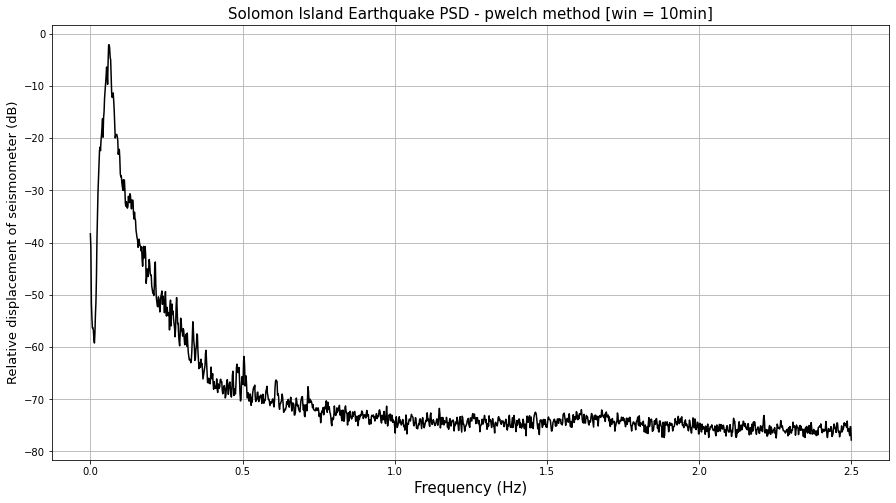

In [15]:
plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(data_pwelch) , c = 'black')
plt.title('Solomon Island Earthquake PSD - pwelch method [win = 10min]' , fontsize = 15)
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.ylabel('Relative displacement of seismometer (dB)' , fontsize = 13)
plt.grid()

Tip: Here we are experiencing a down-sampling occurance. We will get to that later on. 

### 3.2 Setup Time-Frequency Analysis
Wavelets sliding from the minimum frequency to the maximum, each with different width. 

In [16]:
numFrex = 40 # Number of wavelets
minFreq = 0.2 
maxFreq = sample_rate/2
npntsTF = 1000

Freqx = np.linspace(minFreq , maxFreq , numFrex) # Frequencies 
FWHM  = np.linspace(5 , 15 , numFrex) # Wavelet widths (FWHM in sec)
tidx  = np.linspace(0 , len(time) , npntsTF)

wave_time = np.arange(-10, 10 , 1/sample_rate)
half_win  = int(np.floor(len(wave_time)/2))
nConv     = len(wave_time) + len(data) - 1

In [17]:
comp_more_wavelet = np.zeros((len(wave_time) , numFrex)) + 1j*np.zeros((len(wave_time) , numFrex))
for fi in range(numFrex):
    comp_more_wavelet[:,fi] = np.exp( 2*1j*np.pi*Freqx[fi]*wave_time ) * np.exp( -( 4*np.log(2)*wave_time**2 ) / FWHM[fi]**2 )

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


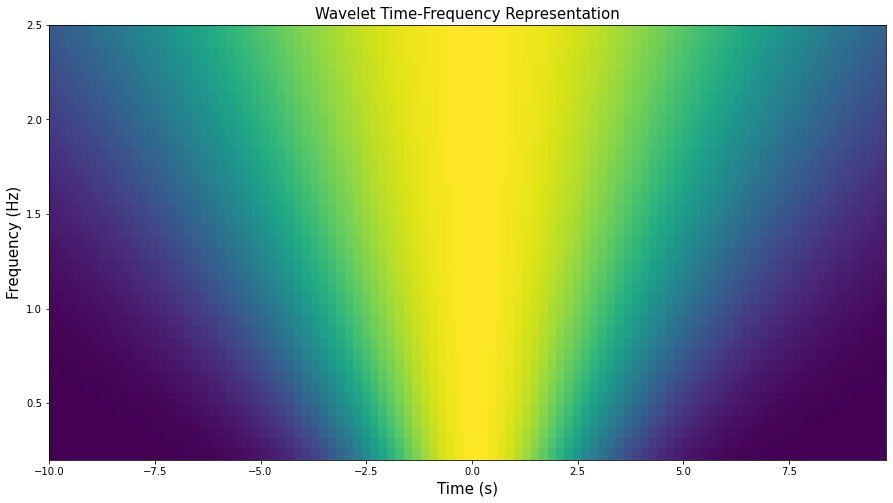

In [18]:
time2d, Freq2d = np.meshgrid(wave_time, Freqx)
plt.figure(figsize = (15,8))
plt.pcolormesh(time2d, Freq2d , np.abs(comp_more_wavelet.T))
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Frequency (Hz)' , fontsize = 15)
plt.title('Wavelet Time-Frequency Representation', fontsize = 15);

In [19]:
dataX = np.fft.fft(data , nConv)

data_TF = np.zeros((numFrex , len(data) - 1))
data_TF_normalized = np.zeros((numFrex , len(data) - 1))
for fi in range(numFrex):
    waveX  = np.fft.fft(comp_more_wavelet[:,fi] , nConv)
    waveX  = waveX / np.max(waveX)
    
    dataX_conv     = np.fft.ifft( waveX * dataX ) 
    dataX_conv     = dataX_conv[half_win:len(dataX_conv)-half_win]
    dataX_conv_pow = np.abs(dataX_conv) ** 2
    
    prequake_conv_pow      = dataX_conv_pow[:np.argmin(abs(time - 1300))]
    prequake_conv_pow_mean = np.mean(prequake_conv_pow)
    
    data_TF[fi]            = 10*np.log10(dataX_conv_pow)
    data_TF_normalized[fi] = 10*np.log10(dataX_conv_pow / prequake_conv_pow_mean)

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.
E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


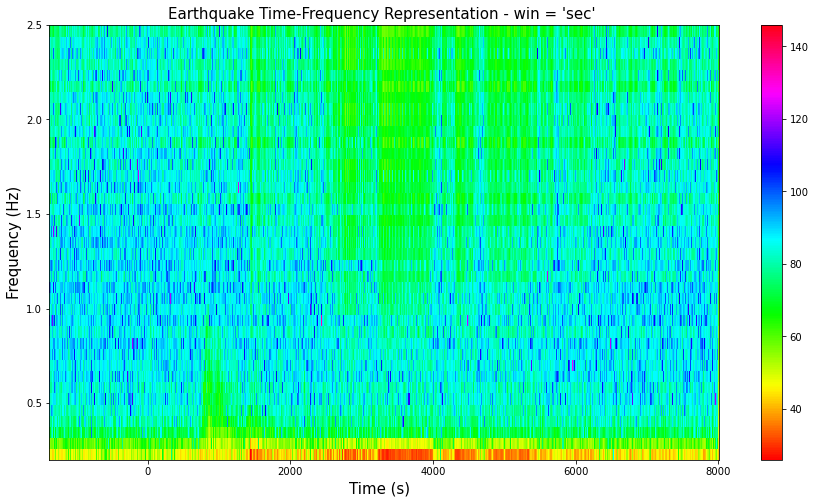

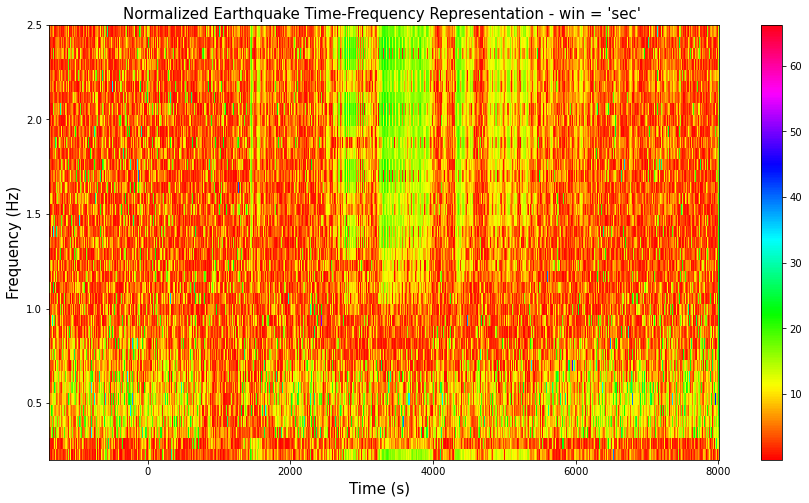

In [20]:
time2d, Freq2d = np.meshgrid(time - 1, Freqx)

plt.figure(figsize = (15,8))
plt.pcolormesh(time2d, Freq2d , np.abs(data_TF) , cmap = 'hsv')
plt.xlabel('Time (s)  ' , fontsize = 15)
plt.ylabel('Frequency (Hz)' , fontsize = 15)
plt.colorbar()
plt.title('Earthquake Time-Frequency Representation - win = \'sec\' ', fontsize = 15);

plt.figure(figsize = (15,8))
plt.pcolormesh(time2d, Freq2d , np.abs(data_TF_normalized), cmap = 'hsv')
plt.xlabel('Time (s)  ' , fontsize = 15)
plt.colorbar()
plt.ylabel('Frequency (Hz)' , fontsize = 15)
plt.title('Normalized Earthquake Time-Frequency Representation - win = \'sec\' ', fontsize = 15);

In [21]:
data_TF_cumsum = []
data_TF_normalized_cumsum = [] 
data_TF_mean = []
data_TF_normalized_mean = []
for fi in range(numFrex):
    for count in range(len(data) - 1):
        data_TF_cumsum = np.append(data_TF_cumsum , data_TF[fi , count])
        data_TF_normalized_cumsum = np.append(data_TF_normalized_cumsum , data_TF_normalized[fi , count])
        if np.mod(count,60*sample_rate) == 0 :
            data_TF_mean       = np.append(data_TF_mean , np.mean(data_TF_cumsum))
            data_TF_normalized_mean = np.append(data_TF_normalized_mean , np.mean(data_TF_normalized_cumsum))
            data_TF_cumsum = []
            data_TF_normalized_cumsum = [] 
data_TF_mean = np.reshape(data_TF_mean , (numFrex , -1))
data_TF_normalized_mean = np.reshape(data_TF_normalized_mean , (numFrex , -1))

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """
E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


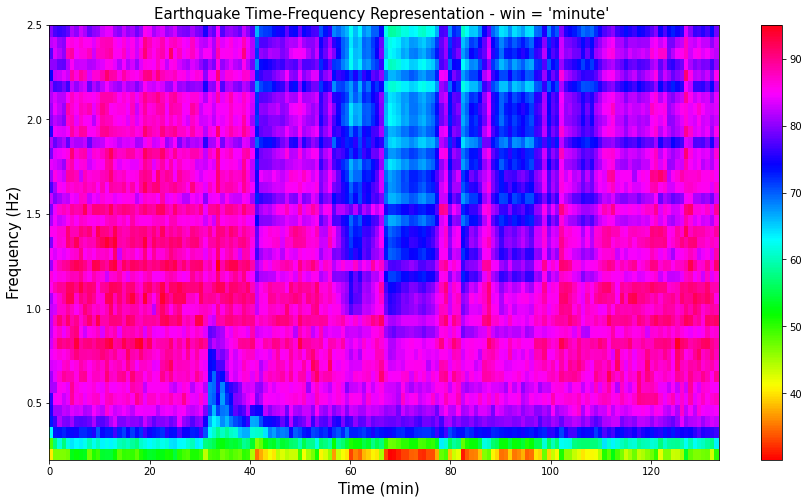

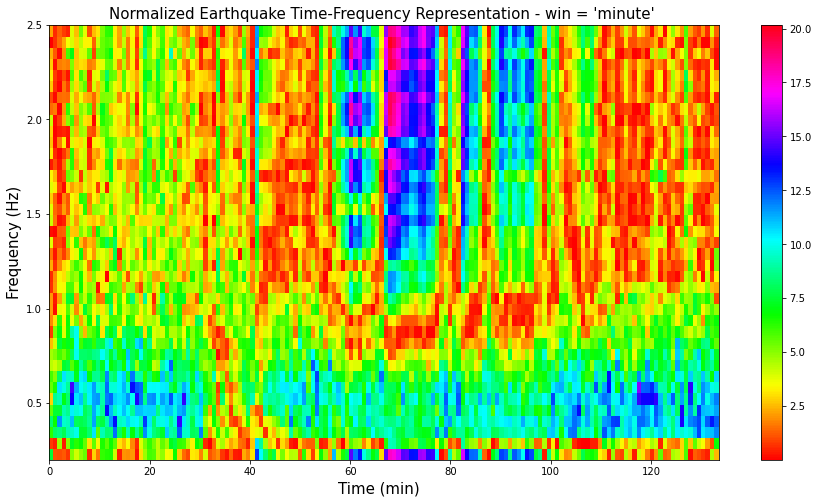

In [22]:
time_minute = np.linspace(0 , max(time)/60 , len(np.arange(0 , len(time)-1 , 60*sample_rate) ) )
time2d, Freq2d = np.meshgrid(time_minute, Freqx)

plt.figure(figsize = (15,8))
plt.pcolormesh(time2d, Freq2d , np.abs(data_TF_mean) , cmap = 'hsv')
plt.xlabel('Time (min)  ' , fontsize = 15)
plt.ylabel('Frequency (Hz)' , fontsize = 15)
plt.colorbar()
plt.title('Earthquake Time-Frequency Representation - win = \'minute\' ', fontsize = 15);

plt.figure(figsize = (15,8))
plt.pcolormesh(time2d, Freq2d , np.abs(data_TF_normalized_mean), cmap = 'hsv')
plt.xlabel('Time (min)  ' , fontsize = 15)
plt.colorbar()
plt.ylabel('Frequency (Hz)' , fontsize = 15)
plt.title('Normalized Earthquake Time-Frequency Representation - win = \'minute\' ', fontsize = 15);